In [0]:
import numpy as np
import pandas as pd
#data_global_raw_url = 'https://raw.githubusercontent.com/cemansilla/covid-19-notebook/master/server/data/global.json'
#df1 = pd.read_json(data_global_raw_url)
#print(df1.head())

Importación de datos

In [0]:
#TODO: automatizar la captura de datos
cases_by_days = [1,0,1,6,1,3,0,7,0,12,3,11,11,9,14,18,31,30,67,41,35,86,115,87,101,55,75,146,76,167,132,186]
deaths_by_days = [0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,2,2,4,5,2,1,4,6,7,3,6]

#Cálculo de acumulativo a través de los días
cases = np.cumsum(cases_by_days)
deaths = np.cumsum(deaths)

Cálculo del factor de incremento en base a casos confirmados

In [0]:
#Descarto n cantidad de días del principio
offset_days = 1
cases = cases[offset_days:]

values = []
for i, val in enumerate(cases):
  if(i > 0 and cases[i-1] > 0):
    f = cases[i] / cases[i-1] #Factor
    values.append(f)

#Media del factor
growth_factor = np.mean(values)

Cálculo de predicción

In [0]:
days_to_predict = 5
forecast_days = len(cases) + days_to_predict

forecast = []
i = 1
while i <= forecast_days:
  try:
    last_forecast = cases[i-1]
  except:
    last_forecast = forecast[-1]

  f = growth_factor * last_forecast
  forecast.append(f)

  i+=1

Vinculación de datos con días (cuando trabaje con el dataset esto saldrá de ahí)

In [0]:
start_date = pd.to_datetime('2020-03-04')

forecast_by_days = []
cases_by_days = []
deaths_by_days = []
i = 0
for day in pd.date_range(start_date, periods=forecast_days, freq='D'):
  #Capturo dato de predicción
  try:
    data_forecast = forecast[i]
  except:
    data_forecast = 0

  forecast_by_days.append({
    'date': day.strftime("%d-%m-%Y"),
    'cases': data_forecast
  })

  #Capturo dato de casos confirmados
  try:
    data_cases = cases[i]
  except:
    data_cases = 0

  cases_by_days.append({
    'date': day.strftime("%d-%m-%Y"),
    'cases': data_cases
  })

  #Capturo dato de muertes confirmadas
  try:
    data_deaths = deaths[i]
  except:
    data_deaths = 0

  deaths_by_days.append({
    'date': day.strftime("%d-%m-%Y"),
    'deaths': data_deaths
  })
  
  i+=1

Grafico

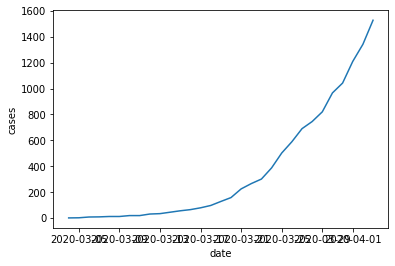

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt

#Obtengo los días en el rango especificado
df_dates = pd.DataFrame(pd.date_range(start_date, periods=forecast_days, freq='D'))

df_cases = pd.DataFrame(cases)
df_cases = pd.concat([df_dates, df_cases], axis=1)
df_cases.columns = ['date', 'cases']

sns.lineplot(data=df_cases, x='date', y='cases')
plt.show()

Muertes

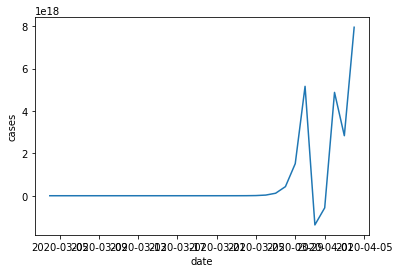

In [490]:
df_deaths = pd.DataFrame(deaths)
df_deaths = pd.concat([df_dates, df_deaths], axis=1)
df_deaths.columns = ['date', 'cases']

sns.lineplot(data=df_deaths, x='date', y='cases')
plt.show()

Predicción

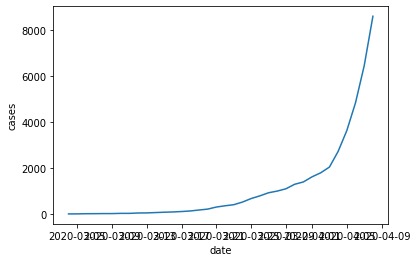

In [491]:
df_forecast = pd.DataFrame(forecast)
df_forecast = pd.concat([df_dates, df_forecast], axis=1)
df_forecast.columns = ['date', 'cases']

sns.lineplot(data=df_forecast, x='date', y='cases')
plt.show()